# **Importing Packages**

In [463]:
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats import weightstats as stests
import scipy.stats as stats
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

import plotly.express as px
import plotly.graph_objs as go



# **Data Importing**

In [464]:
#reading csv file
data=pd.read_csv('E:/HR analytics and prediction/Excel Files/employee_attrition.csv')
pd.set_option("display.max_columns", 10000)
data

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Yes
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,No
2,4,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,Yes
3,5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,No
4,7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,No
1466,2062,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,No
1467,2064,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,No
1468,2065,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,No


In [465]:
#checking column names
print(data.columns)

#checking for datatypes
print(data.dtypes)

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')
EmployeeNumber               int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                   

In [466]:
#checking for null values
data.isnull().sum()

EmployeeNumber              0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

Observed data is perfectly cleaned, hence it can be proceeded for EDA purpose

In [467]:
#removing unwanted columns
data.drop('EmployeeNumber',axis=1,inplace=True)

In [468]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,No


In [469]:
#converting Nominal categorical data into numerical data
data['MaritalStatus'].replace(['Single','Married','Divorced'],[1,2,3],inplace=True)
data['BusinessTravel'].replace(['Travel_Rarely','Travel_Frequently','Non-Travel'],[1,2,3],inplace=True)
data['Department'].replace(['Sales','Research & Development','Human Resources'],[1,2,3],inplace=True)
data['EducationField'].replace(['Life Sciences','Medical','Other','Marketing','Technical Degree','Human Resources'],[1,2,3,4,5,6],inplace=True)
data['Gender'].replace(['Male','Female'],[1,2],inplace=True)
data['OverTime'].replace(['Yes','No'],[1,2],inplace=True)
data['JobRole'].replace(['Sales Executive','Research Scientist',
                         'Laboratory Technician','Manufacturing Director',
                         'Healthcare Representative','Manager',
                         'Sales Representative','Research Director','Human Resources'],[1,2,3,4,5,6,7,8,9],inplace=True)
data['Attrition'].replace(['Yes','No'],[1,2],inplace=True)

In [470]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1,1102,1,1,2,1,2,2,94,3,2,1,4,1,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,2,279,2,8,1,1,3,1,61,2,2,2,2,2,5130,24907,1,2,23,4,4,1,10,3,3,10,7,1,7,2
2,37,1,1373,2,2,2,3,4,1,92,2,1,3,3,1,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,2,1392,2,3,4,1,4,2,56,3,1,2,3,2,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,2
4,27,1,591,2,2,1,2,1,1,40,3,1,3,2,2,3468,16632,9,2,12,3,4,1,6,3,3,2,2,2,2,2


**Performing Visualization Techniques to understand more about numerical continous, nominal, ordinal data**

In [471]:
#dividing the dataset into several types for easier exploration
continous=['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','Attrition'] #continous data column names
nominal=['BusinessTravel','Department','EducationField','Gender','OverTime','JobRole','Attrition']#nominal data column names
ordinal=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
         'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','Attrition'] #ordinal data column names
other_cols= ['StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion'
            ,'YearsWithCurrManager','Attrition']

data_continous=pd.DataFrame()
data_continous=data.loc[:,['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','Attrition']] #extracting all the continous data


data_nominal=pd.DataFrame()
data_nominal=data.loc[:,['BusinessTravel','Department','EducationField','Gender','OverTime','JobRole','Attrition']] # extracting all nominal data

data_ordinal=pd.DataFrame()
data_ordinal=data.loc[:,['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
                         'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','Attrition']] #extracting all ordinal data

data_other_cols=pd.DataFrame()
data_other_cols = data.loc[:,['StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition']]

In [472]:
#exploring data thorugh coninous data
data_continous.describe() #finding statistical data

,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,65.891156,6502.931293,14313.103401,15.209524,1.838776
std,9.135373,403.509100,20.329428,4707.956783,7117.786044,3.659938,0.367863
min,18.000000,102.000000,30.000000,1009.000000,2094.000000,11.000000,1.000000
25%,30.000000,465.000000,48.000000,2911.000000,8047.000000,12.000000,2.000000
50%,36.000000,802.000000,66.000000,4919.000000,14235.500000,14.000000,2.000000
75%,43.000000,1157.000000,83.750000,8379.000000,20461.500000,18.000000,2.000000
max,60.000000,1499.000000,100.000000,19999.000000,26999.000000,25.000000,2.000000


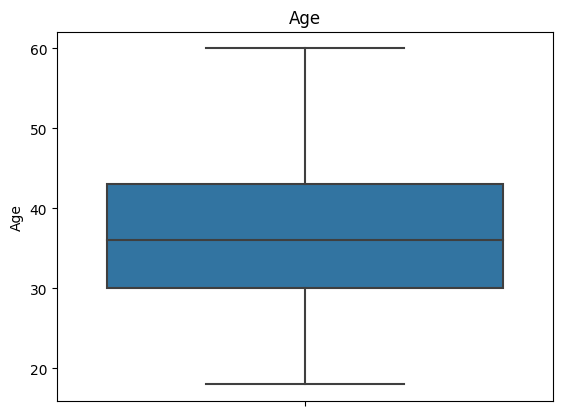

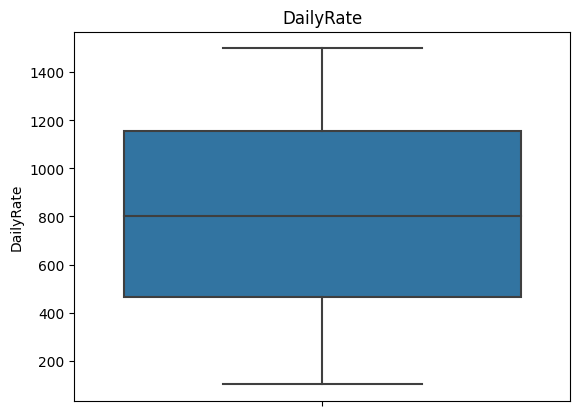

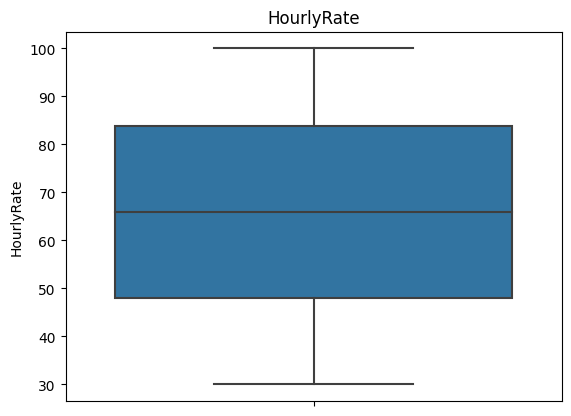

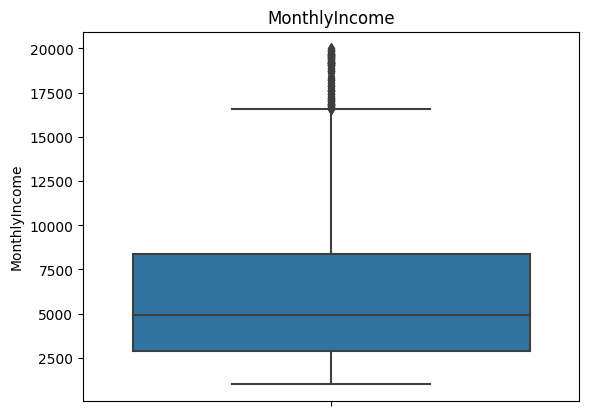

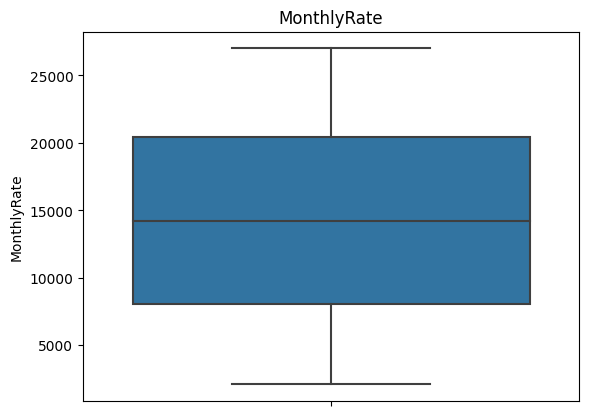

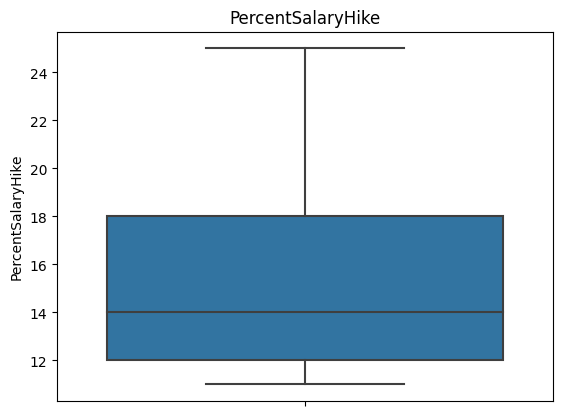

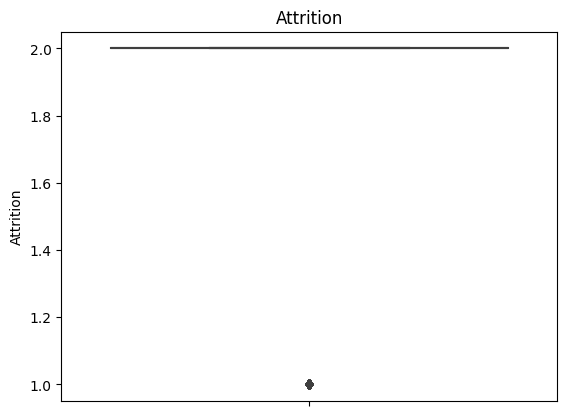

In [473]:
#performing box-plot on continous dataframe
for i in continous:
    plt.figure(i)
    fig=sns.boxplot(y=data_continous[i])
    plt.title(i)
    

From above visualizations it seems like only monthly income required changes as of now.

In [474]:
data_nominal.head()

,BusinessTravel,Department,EducationField,Gender,OverTime,JobRole,Attrition
0,1,1,1,2,1,1,1
1,2,2,1,1,2,2,2
2,1,2,3,1,1,3,1
3,2,2,1,2,1,2,2
4,1,2,2,1,2,3,2


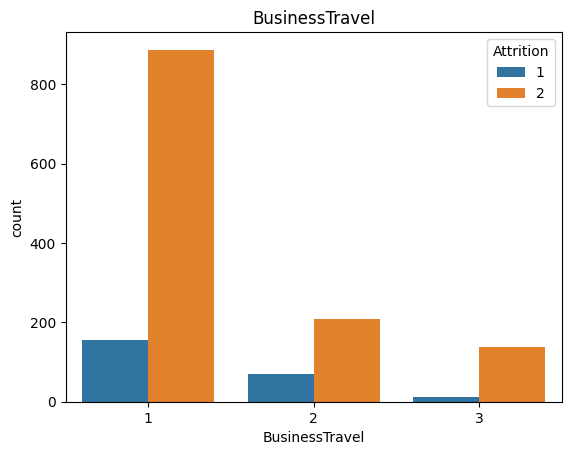

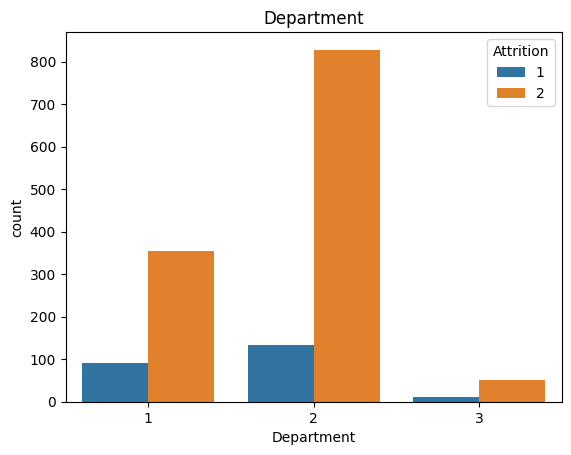

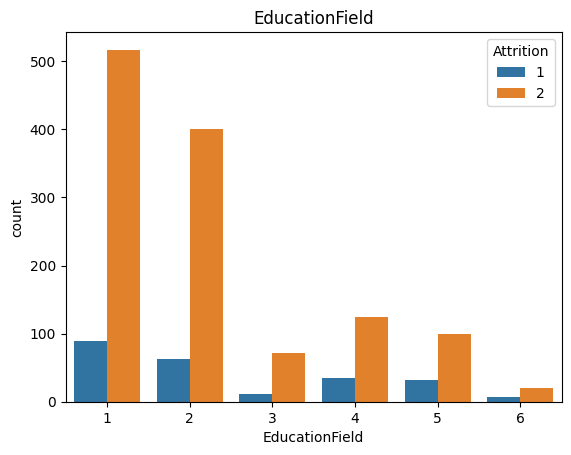

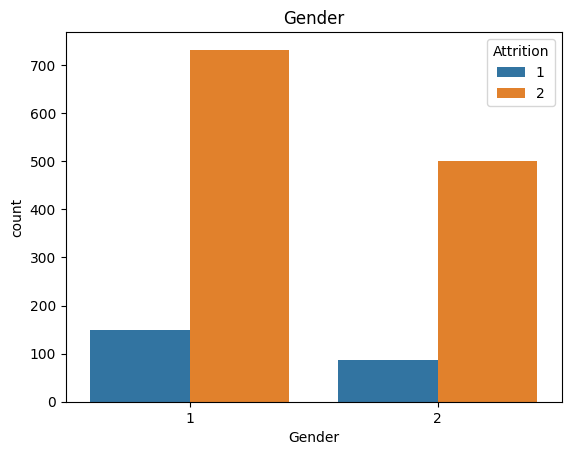

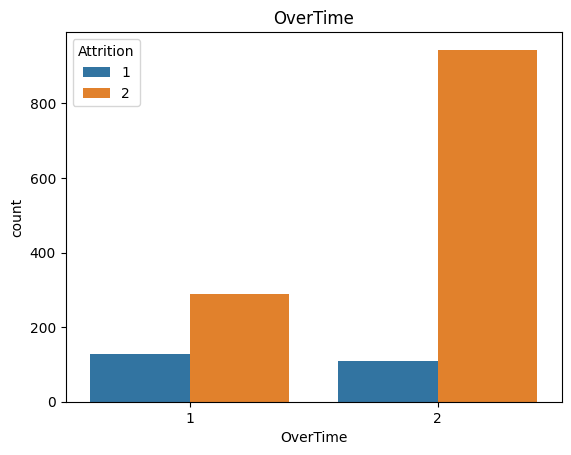

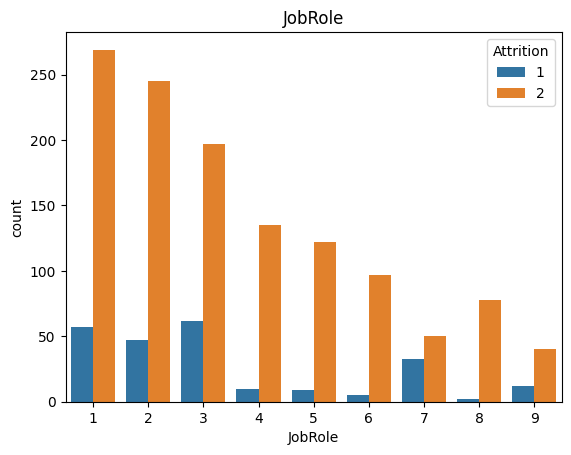

In [475]:
#performing co-relations among the several datasets
nominal1=['BusinessTravel','Department','EducationField','Gender','OverTime','JobRole']
for i in nominal1:
    plt.figure(i)
    sns.countplot(x=data_nominal[i],hue=data_nominal['Attrition'])
    plt.title(i)

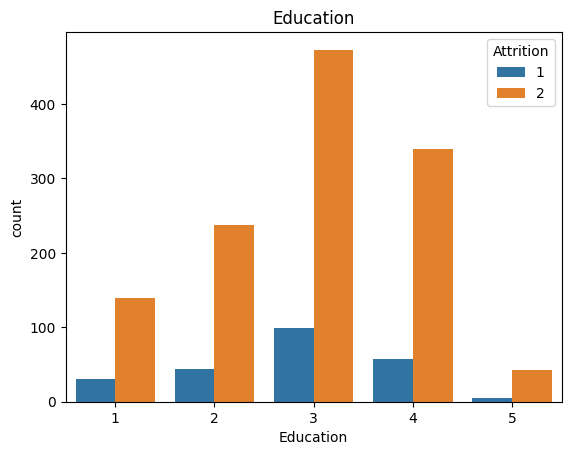

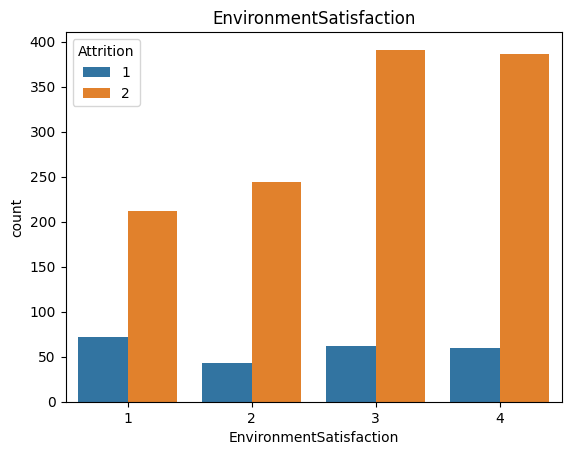

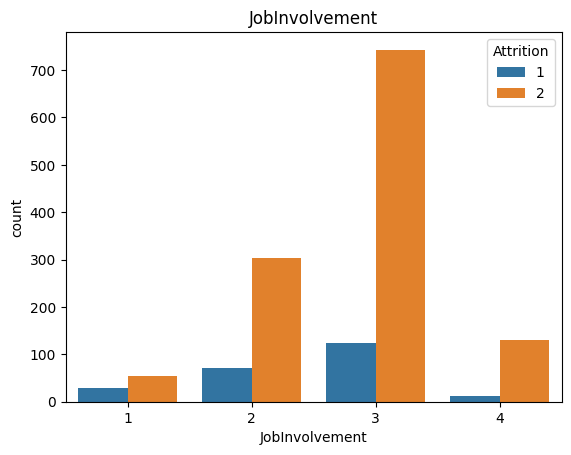

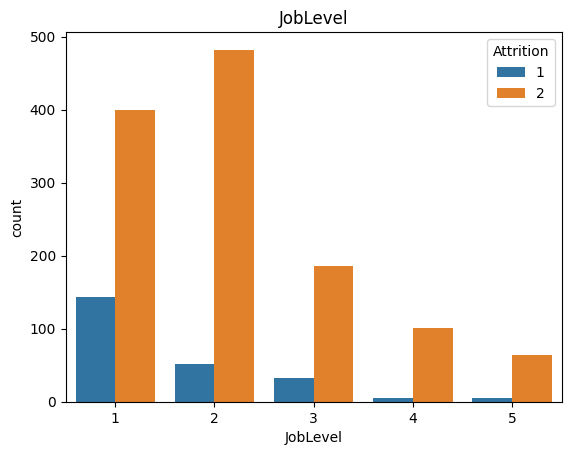

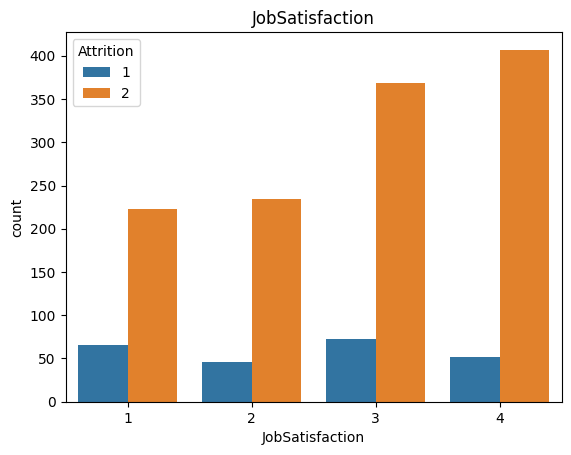

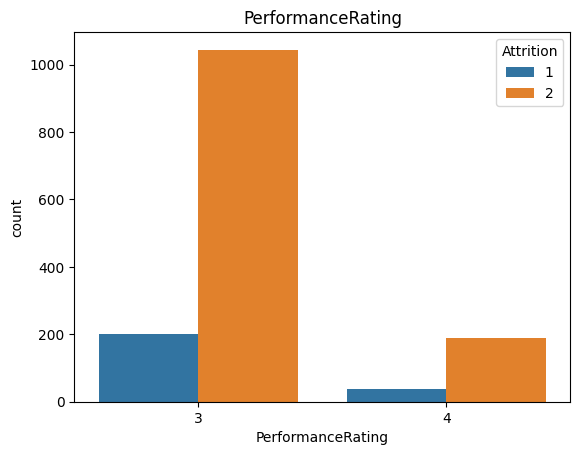

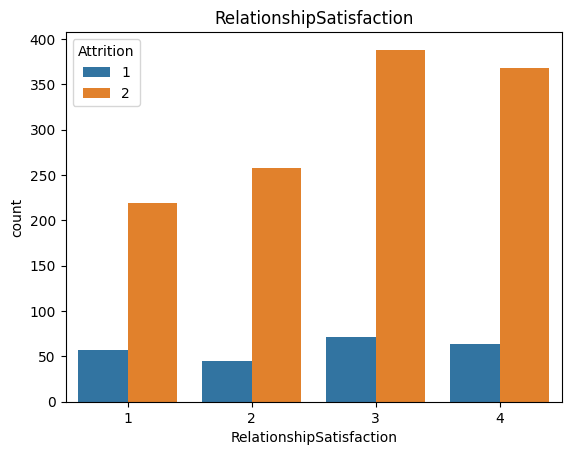

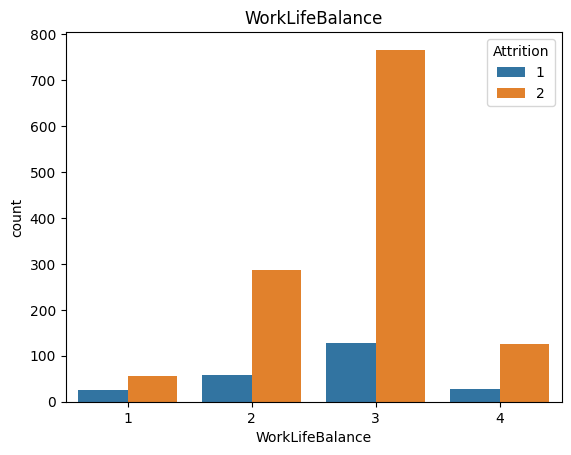

In [476]:
ordinal1=['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
         'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']

for i in ordinal1:
    plt.figure(i)
    sns.countplot(x=data_ordinal[i],hue=data_ordinal['Attrition'])
    plt.title(i)

In [477]:
#finding co-relation between columns
data_continous.corr(numeric_only=True,method='pearson')

,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,Attrition
Age,1.000000,0.010661,0.024287,0.497855,0.028051,0.003634,0.159205
DailyRate,0.010661,1.000000,0.023381,0.007707,-0.032182,0.022704,0.056652
HourlyRate,0.024287,0.023381,1.000000,-0.015794,-0.015297,-0.009062,0.006846
MonthlyIncome,0.497855,0.007707,-0.015794,1.000000,0.034814,-0.027269,0.159840
MonthlyRate,0.028051,-0.032182,-0.015297,0.034814,1.000000,-0.006429,-0.015170
PercentSalaryHike,0.003634,0.022704,-0.009062,-0.027269,-0.006429,1.000000,0.013478
Attrition,0.159205,0.056652,0.006846,0.159840,-0.015170,0.013478,1.000000


In [478]:
data_nominal.corr(numeric_only=True,method='pearson')

,BusinessTravel,Department,EducationField,Gender,OverTime,JobRole,Attrition
BusinessTravel,1.000000,-0.009044,-0.024073,-0.032981,0.016543,-0.028664,0.000074
Department,-0.009044,1.000000,-0.092387,-0.041583,0.007481,0.425036,0.063991
EducationField,-0.024073,-0.092387,1.000000,-0.004164,-0.006112,0.030773,-0.089755
Gender,-0.032981,-0.041583,-0.004164,1.000000,-0.041924,0.014824,0.029453
OverTime,0.016543,0.007481,-0.006112,-0.041924,1.000000,0.020850,0.246118
JobRole,-0.028664,0.425036,0.030773,0.014824,0.020850,1.000000,0.027930
Attrition,0.000074,0.063991,-0.089755,0.029453,0.246118,0.027930,1.000000


In [479]:
data_ordinal.corr(numeric_only=True,method='pearson')

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,Attrition
Education,1.000000,-0.027128,0.042438,0.101589,-0.011296,-0.024539,-0.009118,0.009819,0.031373
EnvironmentSatisfaction,-0.027128,1.000000,-0.008278,0.001212,-0.006784,-0.029548,0.007665,0.027627,0.103369
JobInvolvement,0.042438,-0.008278,1.000000,-0.012630,-0.021476,-0.029071,0.034297,-0.014617,0.130016
JobLevel,0.101589,0.001212,-0.012630,1.000000,-0.001944,-0.021222,0.021642,0.037818,0.169105
JobSatisfaction,-0.011296,-0.006784,-0.021476,-0.001944,1.000000,0.002297,-0.012454,-0.019459,0.103481
PerformanceRating,-0.024539,-0.029548,-0.029071,-0.021222,0.002297,1.000000,-0.031351,0.002572,-0.002889
RelationshipSatisfaction,-0.009118,0.007665,0.034297,0.021642,-0.012454,-0.031351,1.000000,0.019604,0.045872
WorkLifeBalance,0.009819,0.027627,-0.014617,0.037818,-0.019459,0.002572,0.019604,1.000000,0.063939
Attrition,0.031373,0.103369,0.130016,0.169105,0.103481,-0.002889,0.045872,0.063939,1.000000


In [480]:
data_other_cols.corr(numeric_only=True)

,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
StockOptionLevel,1.000000,0.010136,0.011274,0.015058,0.050818,0.014352,0.024698,0.137145
TotalWorkingYears,0.010136,1.000000,-0.035662,0.628133,0.460365,0.404858,0.459188,0.171063
TrainingTimesLastYear,0.011274,-0.035662,1.000000,0.003569,-0.005738,-0.002067,-0.004096,0.059478
YearsAtCompany,0.015058,0.628133,0.003569,1.000000,0.758754,0.618409,0.769212,0.134392
YearsInCurrentRole,0.050818,0.460365,-0.005738,0.758754,1.000000,0.548056,0.714365,0.160545
YearsSinceLastPromotion,0.014352,0.404858,-0.002067,0.618409,0.548056,1.000000,0.510224,0.033019
YearsWithCurrManager,0.024698,0.459188,-0.004096,0.769212,0.714365,0.510224,1.000000,0.156199
Attrition,0.137145,0.171063,0.059478,0.134392,0.160545,0.033019,0.156199,1.000000


# **Performing Hypothesis Testing**

**Hypothesis testing is to be performed for below columns**
1. Overtime
2. job role
3. relationship satisfaction
4. work life balance
5. age
6. job-involvement
7. job-level

In [481]:
#performing t-test hypothesis for Overtime and attrition
col1= data['OverTime']
col2 = data['Attrition']

alpha = 0.05

t_stat, p_val1 = stats.ttest_ind(col1,col2)

if p_val1 < alpha:
    print("Reject null hypothesis, This means Overtime is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between Overtime and Attrition")

print(p_val1, t_stat)

Reject null hypothesis, This means Overtime is related with attrition
1.4417037915833165e-15 -8.025994040126996


In [482]:
#performing t-test hypothesis for JobRole and attrition
col1= data['JobRole']
col2 = data['Attrition']

alpha = 0.05

t_stat, p_val2 = stats.ttest_ind(col1,col2)

if p_val2 < alpha:
    print("Reject null hypothesis, This means jobrole is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between jobrole and Attrition")

print(p_val2, t_stat)

Reject null hypothesis, This means jobrole is related with attrition
1.6849958048938223e-152 27.935088636311644


In [483]:
#performing t-test hypothesis for Relatioship_satisfaction and attrition
col1= data['RelationshipSatisfaction']
col2 = data['Attrition']

alpha = 0.05

t_stat, p_val3 = stats.ttest_ind(col1,col2)

if p_val3 < alpha:
    print("Reject null hypothesis, This means RelationshipSatisfaction is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between OverTime and Attrition")

print(p_val3, t_stat)

Reject null hypothesis, This means RelationshipSatisfaction is related with attrition
5.20930913223875e-166 29.323218604981005


In [484]:
#performing t-test hypothesis for WorkLifeBalance and attrition
col1= data['WorkLifeBalance']
col2 = data['Attrition']

alpha = 0.05

t_stat, p_val4 = stats.ttest_ind(col1,col2)

if p_val4 < alpha:
    print("Reject null hypothesis, This means WorkLifeBalance is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between WorkLifeBalance and Attrition")

print(p_val4, t_stat)

Reject null hypothesis, This means WorkLifeBalance is related with attrition
0.0 44.40263249299789


In [485]:
#performing t-test hypothesis for Age and attrition
col1= data['Age']
col2 = data['Attrition']

alpha = 0.05

t_stat, p_val5 = stats.ttest_ind(col1,col2)

if p_val5 < alpha:
    print("Reject null hypothesis, This means Age is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between Age and Attrition")

print(p_val5, t_stat)

Reject null hypothesis, This means Age is related with attrition
0.0 147.13040834047894


In [486]:
#performing t-test hypothesis for JobInvolvement and attrition
col1= data['JobInvolvement']
col2 = data['Attrition']

alpha = 0.05

t_stat, p_val6 = stats.ttest_ind(col1,col2)

if p_val6 < alpha:
    print("Reject null hypothesis, This means JobInvolvement is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between JobInvolvement and Attrition")

print(p_val6, t_stat)

Reject null hypothesis, This means JobInvolvement is related with attrition
7.69432633636055e-310 42.65461998614697


In [487]:
#performing t-test hypothesis for JobLevel and attrition
col1= data['JobLevel']
col2 = data['Attrition']

alpha = 0.05

t_stat, p_val7 = stats.ttest_ind(col1,col2)

if p_val7 < alpha:
    print("Reject null hypothesis, This means JobLevel is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between JobLevel and Attrition")

print(p_val7, t_stat)

Reject null hypothesis, This means JobLevel is related with attrition
1.7536573232942508e-13 7.401126801894456


**Performing Chi-Square Test For the below mentioned columns**
1. Overtime
2. job role
3. relationship satisfaction
4. work life balance
5. age
6. job-involvement
7. job-level

In [488]:
#performing chi-test hypothesis for overtime and attrition
alpha=0.05

cont_table = pd.crosstab(data['OverTime'],data['Attrition'])

# perform the chi-square test
chi2_stat, p_val8, dof, expected = chi2_contingency(cont_table)

if p_val8 < alpha:
    print("Reject null hypothesis, This means Overtime is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between Overtime and Attrition")

print(p_val8, t_stat)

Reject null hypothesis, This means Overtime is related with attrition
8.158423721538322e-21 7.401126801894456


In [489]:
#performing chi-test hypothesis for JobRole and attrition
alpha=0.05

cont_table = pd.crosstab(data['JobRole'],data['Attrition'])

# perform the chi-square test
chi2_stat, p_val9, dof, expected = chi2_contingency(cont_table)

if p_val9 < alpha:
    print("Reject null hypothesis, This means JobRole is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between JobRole and Attrition")

print(p_val9, t_stat)

Reject null hypothesis, This means JobRole is related with attrition
2.7524816380506567e-15 7.401126801894456


In [490]:
#performing chi-test hypothesis for RelationshipSatisfaction and attrition
alpha=0.05

cont_table = pd.crosstab(data['RelationshipSatisfaction'],data['Attrition'])

# perform the chi-square test
chi2_stat, p_val10, dof, expected = chi2_contingency(cont_table)

if p_val10 < alpha:
    print("Reject null hypothesis, This means RelationshipSatisfaction is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between RelationshipSatisfaction and Attrition")

print(p_val10, t_stat)

Accept Null Hypothesis, This means there is no significance and relation between RelationshipSatisfaction and Attrition
0.15497244371052638 7.401126801894456


In [491]:
#performing chi-test hypothesis for work_life and attrition
alpha=0.05

cont_table = pd.crosstab(data['WorkLifeBalance'],data['Attrition'])

# perform the chi-square test
chi2_stat, p_val11, dof, expected = chi2_contingency(cont_table)

if p_val11 < alpha:
    print("Reject null hypothesis, This means work_life is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between work_life and Attrition")

print(p_val11, t_stat)

Reject null hypothesis, This means work_life is related with attrition
0.0009725698845348822 7.401126801894456


In [492]:
#performing chi-test hypothesis for Age and attrition
alpha=0.05

cont_table = pd.crosstab(data['Age'],data['Attrition'])

# perform the chi-square test
chi2_stat, p_val12, dof, expected = chi2_contingency(cont_table)

if p_val12 < alpha:
    print("Reject null hypothesis, This means Age is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between Age and Attrition")

print(p_val12, t_stat)

Reject null hypothesis, This means Age is related with attrition
2.5758529842770494e-09 7.401126801894456


In [493]:
#performing chi-test hypothesis for JobInvolvement and attrition
alpha=0.05

cont_table = pd.crosstab(data['JobInvolvement'],data['Attrition'])

# perform the chi-square test
chi2_stat, p_val13, dof, expected = chi2_contingency(cont_table)

if p_val13 < alpha:
    print("Reject null hypothesis, This means JobInvolvement is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between JobInvolvement and Attrition")

print(p_val13, t_stat)

Reject null hypothesis, This means JobInvolvement is related with attrition
2.8631806367134195e-06 7.401126801894456


In [494]:
#performing chi-test hypothesis for JobLevel and attrition
alpha=0.05

cont_table = pd.crosstab(data['JobLevel'],data['Attrition'])

# perform the chi-square test
chi2_stat, p_val14, dof, expected = chi2_contingency(cont_table)

if p_val14 < alpha:
    print("Reject null hypothesis, This means JobLevel is related with attrition")
else:
    print("Accept Null Hypothesis, This means there is no significance and relation between JobLevel and Attrition")

print(p_val14, t_stat)

Reject null hypothesis, This means JobLevel is related with attrition
6.634684715458957e-15 7.401126801894456


**Gathering all p_values into one dataframe for better understanding**

In [495]:
hypothesis_table= pd.DataFrame()
hypothesis_table['Column_name']=['OverTime','JobRole','RelationshipSatisfaction','WorkLifeBalance','Age','JobInvolvement','JobLevel']
hypothesis_table['t_test']=[1.4417037915833165e-15,1.6849958048938223e-152,5.20930913223875e-166,
                            0.0,0.0,7.69432633636055e-310,1.7536573232942508e-13]
hypothesis_table['chi_test']=[8.158423721538322e-21,2.7524816380506567e-15,0.15497244371052638,
                            0.0009725698845348822,2.5758529842770494e-09,2.8631806367134195e-06,6.634684715458957e-15]
#hypothesis_table['t_test']=hypothesis_table['t_test'].round(14)
#hypothesis_table['chi_test']=hypothesis_table['chi_test'].round(6)
hypothesis_table

,Column_name,t_test,chi_test
0,OverTime,1.441704e-15,8.158424e-21
1,JobRole,1.684996e-152,2.752482e-15
2,RelationshipSatisfaction,5.209309e-166,1.549724e-01
3,WorkLifeBalance,0.000000e+00,9.725699e-04
4,Age,0.000000e+00,2.575853e-09
5,JobInvolvement,7.694326e-310,2.863181e-06
6,JobLevel,1.753657e-13,6.634685e-15


**From all the above analysis, it is being considered to remove relationship_satisfaction column and to reduce the max_income value to below 17000**

In [496]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1,1102,1,1,2,1,2,2,94,3,2,1,4,1,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,2,279,2,8,1,1,3,1,61,2,2,2,2,2,5130,24907,1,2,23,4,4,1,10,3,3,10,7,1,7,2
2,37,1,1373,2,2,2,3,4,1,92,2,1,3,3,1,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,2,1392,2,3,4,1,4,2,56,3,1,2,3,2,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,2
4,27,1,591,2,2,1,2,1,1,40,3,1,3,2,2,3468,16632,9,2,12,3,4,1,6,3,3,2,2,2,2,2


In [497]:
data = data[data['MonthlyIncome'] < 17000] # removing values above 1700 as they are considered to be outliers
data.drop(['RelationshipSatisfaction','HourlyRate','MonthlyRate','TrainingTimesLastYear','YearsSinceLastPromotion','YearsWithCurrManager'],inplace=True,axis=1) #it is being removed, as it accepts null hypothesis
data.head()

C:\Users\AKHIL TEJA REDDY Y\AppData\Local\Temp\ipykernel_20988\1801390557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['RelationshipSatisfaction','HourlyRate','MonthlyRate','TrainingTimesLastYear','YearsSinceLastPromotion','YearsWithCurrManager'],inplace=True,axis=1) #it is being removed, as it accepts null hypothesis


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition
0,41,1,1102,1,1,2,1,2,2,3,2,1,4,1,5993,8,1,11,3,0,8,1,6,4,1
1,49,2,279,2,8,1,1,3,1,2,2,2,2,2,5130,1,2,23,4,1,10,3,10,7,2
2,37,1,1373,2,2,2,3,4,1,2,1,3,3,1,2090,6,1,15,3,0,7,3,0,0,1
3,33,2,1392,2,3,4,1,4,2,3,1,2,3,2,2909,1,1,11,3,0,8,3,8,7,2
4,27,1,591,2,2,1,2,1,1,3,1,3,2,2,3468,9,2,12,3,1,6,3,2,2,2


In [498]:
data.to_csv('2nd_part.csv')